In [1]:
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()

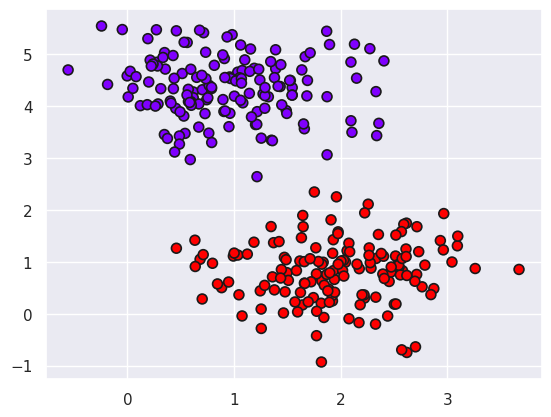

In [3]:
from sklearn.datasets import make_blobs

X,y = make_blobs(n_samples=300, n_features=2, centers=2,
                 random_state=0, cluster_std=0.6)
plt.scatter(X[:,0], X[:,1], c=y, s=50, ec='k', lw=1.2,
            cmap=mpl.colormaps['rainbow'].resampled(2))

In [4]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1e10)
model.fit(X,y)

SVC(C=10000000000.0, kernel='linear')

In [5]:
def plot_decision_function(model, ax=None, plot_support=True):
  if ax is None:
    ax  = plt.gca()

  xlim  = ax.get_xlim()
  ylim  = ax.get_ylim()
  x     = np.linspace(xlim[0], xlim[1], 30)
  y     = np.linspace(ylim[0], ylim[1], 30)
  X,Y   = np.meshgrid(x,y)
  xy    = np.vstack([X.ravel(), Y.ravel()]).T
  P     = model.decision_function(xy).reshape(X.shape)

  ax.contour(X, Y, P, colors='k',
             levels=[-1,0,1], linestyles=['--','-','--'])

  if plot_support:
    ax.scatter(model.support_vectors_[:,0],
               model.support_vectors_[:,1],
               s=300, ec='k', fc='none', lw=1.2)

  ax.set_xlim(xlim)
  ax.set_ylim(ylim)

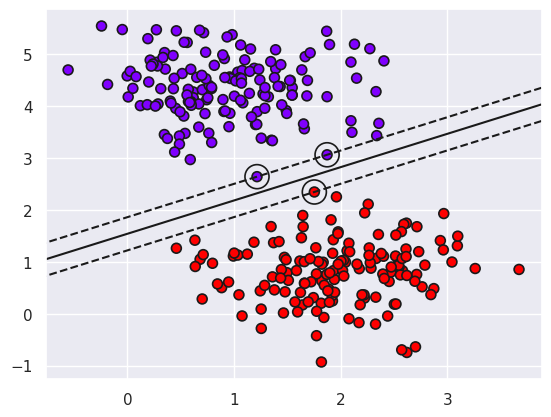

In [6]:
from sklearn.svm import SVC

model = SVC(kernel='linear', C=1e10)
model.fit(X,y)

plt.scatter(X[:,0], X[:,1], c=y, s=50, ec='k', lw=1.2,
            cmap=mpl.colormaps['rainbow'].resampled(2))
plot_decision_function(model)

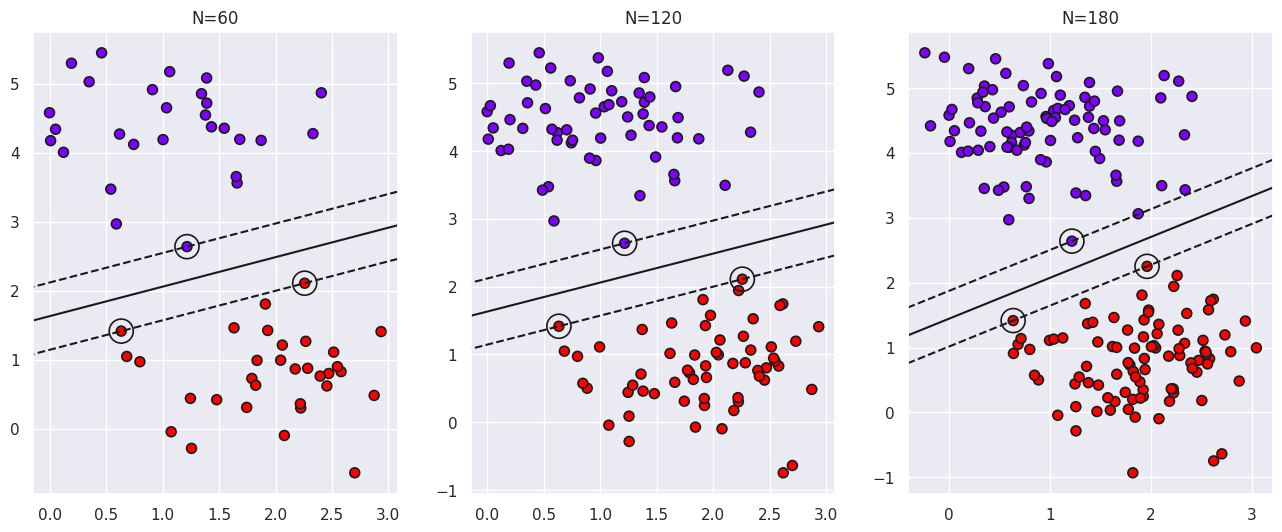

In [7]:
def plot_svm(N, ax=None):
  ax  = ax or plt.gca()

  X,y = make_blobs(n_samples=300, n_features=2, centers=2,
                   random_state=0, cluster_std=0.6)
  X   = X[:N]
  y   = y[:N]

  model = SVC(kernel='linear', C=1e10)
  model.fit(X,y)

  ax.scatter(X[:,0], X[:,1], c=y, s=50, ec='k', lw=1.2,
             cmap=mpl.colormaps['rainbow'].resampled(2))
  plot_decision_function(model, ax=ax, plot_support=True)

fig,ax = plt.subplots(1,3,figsize=(16,6))

for N,axi in zip([60,120,180], ax):
  plot_svm(N, ax=axi)
  axi.set_title(f'N={N}')

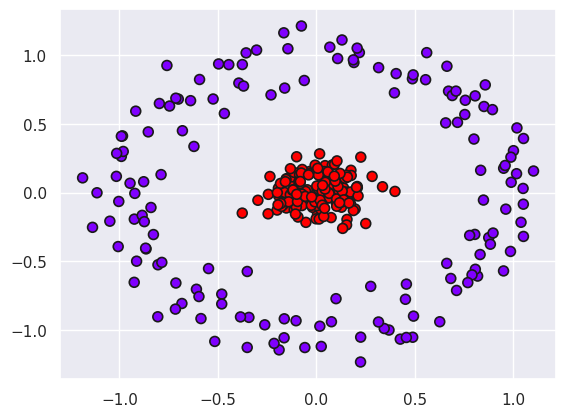

In [8]:
from sklearn.datasets import make_circles

X,y = make_circles(n_samples=300, factor=0.1, noise=0.1)
plt.scatter(X[:,0], X[:,1], c=y, s=50, ec='k', lw=1.2,
            cmap=mpl.colormaps['rainbow'].resampled(2))

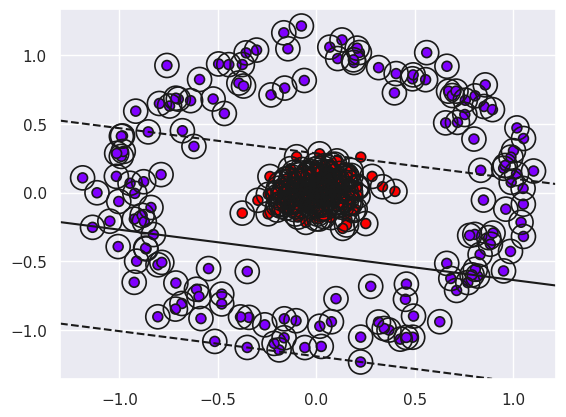

In [9]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(X,y)

plt.scatter(X[:,0], X[:,1], c=y, s=50, ec='k', lw=1.2,
            cmap=mpl.colormaps['rainbow'].resampled(2))
plot_decision_function(model)

In [10]:
r = np.exp(-X**2).sum(axis=1)
r.shape

(300,)

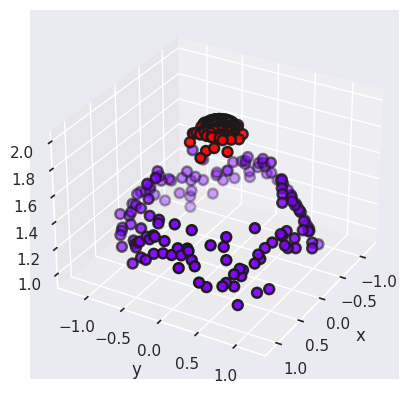

In [11]:
def plot3D(X, y):
  ax  = plt.subplot(projection='3d')
  ax.scatter3D(X[:,0], X[:,1], r, c=y, s=50, ec='k', lw=1.8,
               cmap=mpl.colormaps['rainbow'].resampled(2))
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('r')
  ax.view_init(azim=30, elev=30)

plot3D(X,y)

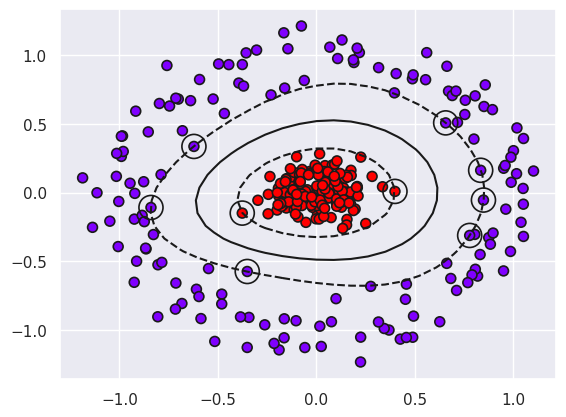

In [12]:
from sklearn.svm import SVC

model = SVC(kernel='rbf', C=1e6)
model.fit(X,y)

plt.scatter(X[:,0], X[:,1], c=y, s=50, ec='k', lw=1.2,
            cmap=mpl.colormaps['rainbow'].resampled(2))
plot_decision_function(model)

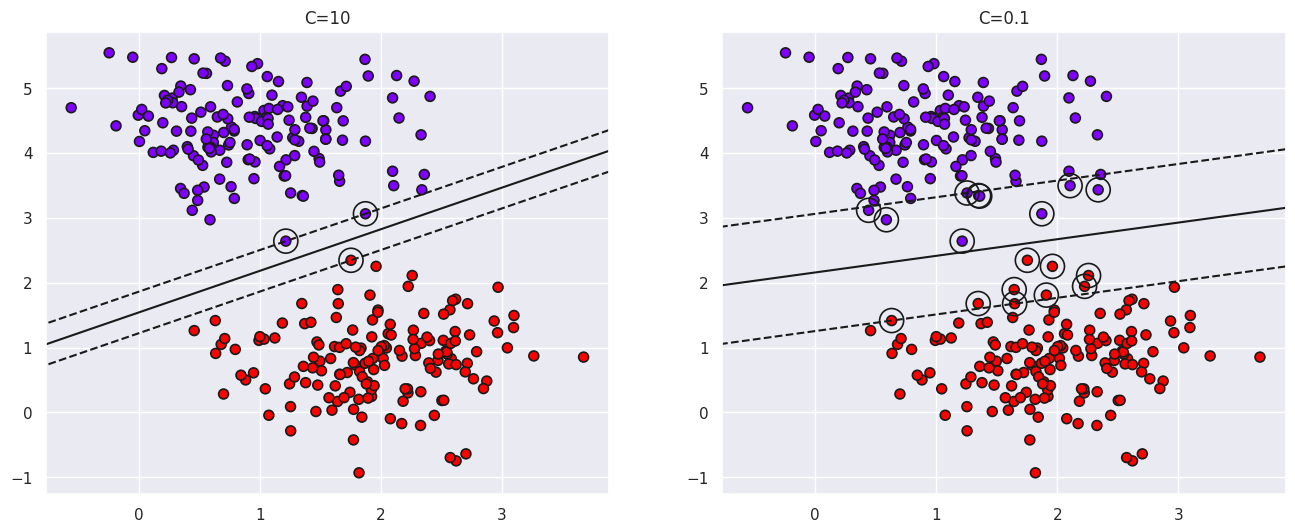

In [13]:
from sklearn.datasets import make_blobs
from sklearn.svm  import SVC

fig,ax = plt.subplots(1,2, figsize=(16,6))
X,y = make_blobs(n_samples=300, n_features=2, centers=2,
                 random_state=0, cluster_std=0.6)

for C,axi in zip([10,0.1], ax):
  model = SVC(kernel='linear', C=C)
  model.fit(X,y)

  axi.scatter(X[:,0], X[:,1], c=y, s=50, ec='k', lw=1.2,
             cmap=mpl.colormaps['rainbow'].resampled(2))
  plot_decision_function(model, ax=axi, plot_support=True)
  axi.set_title(f'C={C}')